# CAMUS 2D - Prediction results

In [2]:
# Imports
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

## Plot function

In [3]:
def show_plots(title, ED, ED_p, ES, ES_p):
    fig = plt.figure(figsize=(8, 8))
    gs = fig.add_gridspec(2, 2, hspace=0.1, wspace=0.1)
    (ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')

    fig.suptitle(title, fontsize=15)
    
    ax1.imshow(ED[0], cmap='gray')
    ax1.axis('auto')
    ax1.set_title("End Diastolic")
    plt.setp(ax1.get_yticklabels(), visible=False)
    ax1.tick_params(axis='both', which='both', labelsize=0)

    ax2.imshow(ES[0], cmap='gray')
    ax2.axis('auto')
    ax2.set_title("End Systolic")

    ax3.imshow(ED_p[0], cmap='gray')
    ax3.axis('auto')
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    ax3.tick_params(axis='both', which='both', labelsize=0)

    ax4.imshow(ES_p[0], cmap='gray')
    ax4.axis('auto')
    plt.setp(ax4.get_xticklabels(), visible=False)

    for ax in fig.get_axes():
        ax.label_outer()

In [11]:
def plots_with_transperency(title, ED, ED_p, ES, ES_p):
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(2, 3, hspace=0.1, wspace=0.1)
    (ax1, ax2, ax3), (ax4, ax5, ax6) = gs.subplots(sharex='col', sharey='row')

    # END-DIASTOLIC
    ax1.imshow(ED[0], cmap='gray')
    ax1.axis('auto')
    ax1.set_ylabel("End Diastolic", fontsize=15)
    
    ax2.imshow(ED_p[0], cmap='gray')
    ax2.axis('auto')
    
    ax3.imshow(ED[0], cmap='gray')
    ax3.imshow(ED_p[0], alpha=(ED_p[0]>0)*0.1, cmap='Accent')
    ax3.axis('auto')
    
    # END-SYSTOLIC
    ax4.imshow(ES[0], cmap='gray')
    ax4.axis('auto')
    ax4.set_ylabel("End Systolic", fontsize=15)
    
    ax5.imshow(ES_p[0], cmap='gray')
    ax5.axis('auto')
    
    ax6.imshow(ES[0], cmap='gray')
    ax6.imshow(ES_p[0], alpha=(ED_p[0]>0)*0.1, cmap='Accent')
    ax6.axis('auto')

    for ax in fig.get_axes():
        ax.label_outer()

## Patient0001 Two-chamber (2CH)

In [12]:
os.chdir('C:/Users/oriol/OneDrive/Escritorio/TFG/')
patient0001_2CH_ED = io.imread('Database/testing/patient0001/patient0001_2CH_ED.mhd', plugin='simpleitk')
patient0001_2CH_ED_pred = io.imread('Database/Prediction/Task250_2DLeftVentricle/patient0001_2CH_ED.nii', plugin='simpleitk')

patient0001_2CH_ES = io.imread('Database/testing/patient0001/patient0001_2CH_ES.mhd', plugin='simpleitk')
patient0001_2CH_ES_pred = io.imread('Database/Prediction/Task250_2DLeftVentricle/patient0001_2CH_ES.nii', plugin='simpleitk')

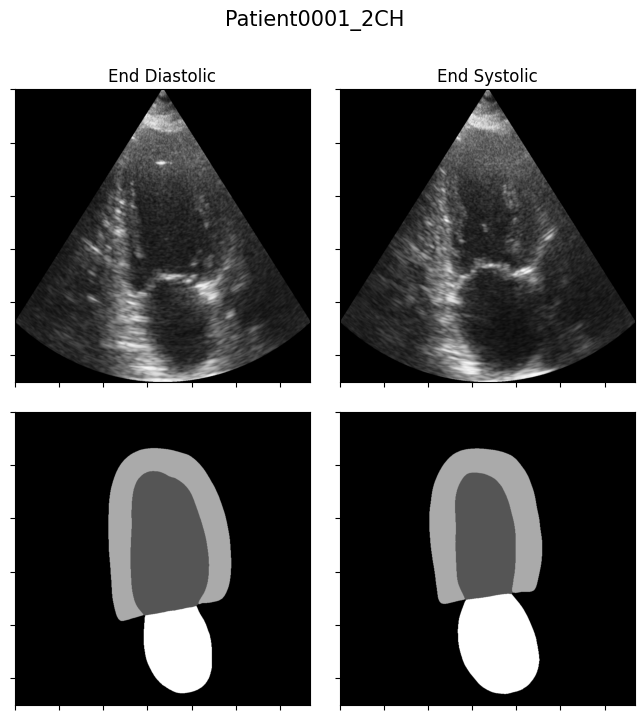

In [13]:
show_plots('Patient0001_2CH', patient0001_2CH_ED, patient0001_2CH_ED_pred, patient0001_2CH_ES, patient0001_2CH_ES_pred)

## Patient0001 Four-chamber (4CH)

In [14]:
patient0001_4CH_ED = io.imread('Database/testing/patient0001/patient0001_4CH_ED.mhd', plugin='simpleitk')
patient0001_4CH_ED_pred = io.imread('Database/Prediction/Task250_2DLeftVentricle/patient0001_4CH_ED.nii', plugin='simpleitk')

patient0001_4CH_ES = io.imread('Database/testing/patient0001/patient0001_4CH_ES.mhd', plugin='simpleitk')
patient0001_4CH_ES_pred = io.imread('Database/Prediction/Task250_2DLeftVentricle/patient0001_4CH_ES.nii', plugin='simpleitk')

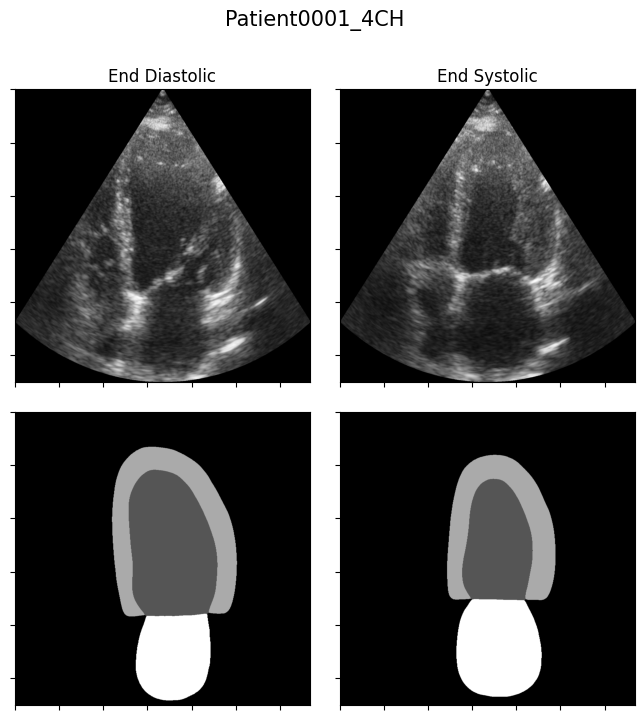

In [15]:
show_plots('Patient0001_4CH', patient0001_4CH_ED, patient0001_4CH_ED_pred, patient0001_4CH_ES, patient0001_4CH_ES_pred)

## Interactive random patient

In [16]:
def show_images(testing_folder, prediction_folder, patient, view, zeros):
    ED_path = ('{}/patient{}{}/patient{}{}_{}_ED.mhd'.format(testing_folder, zeros, patient, zeros, patient, view))
    ED = io.imread(ED_path, plugin='simpleitk')

    ED_pred_path = ('{}/patient{}{}_{}_ED.nii'.format(prediction_folder, zeros, patient, view))
    ED_pred = io.imread(ED_pred_path, plugin='simpleitk')

    ES_path = ('{}/patient{}{}/patient{}{}_{}_ES.mhd'.format(testing_folder, zeros, patient, zeros, patient, view))
    ES = io.imread(ES_path, plugin='simpleitk')

    ES_pred_path = ('{}/patient{}{}_{}_ES.nii'.format(prediction_folder, zeros, patient, view))
    ES_pred = io.imread(ES_pred_path, plugin='simpleitk')
    
    plots_with_transperency('Patient{}{}_{}'.format(zeros, patient, view), ED, ED_pred, ES, ES_pred)

1. Enter patient number (1-50): 32
2. Choose view (2CH-4CH): 4CH
Loading Patient0032_4CH...


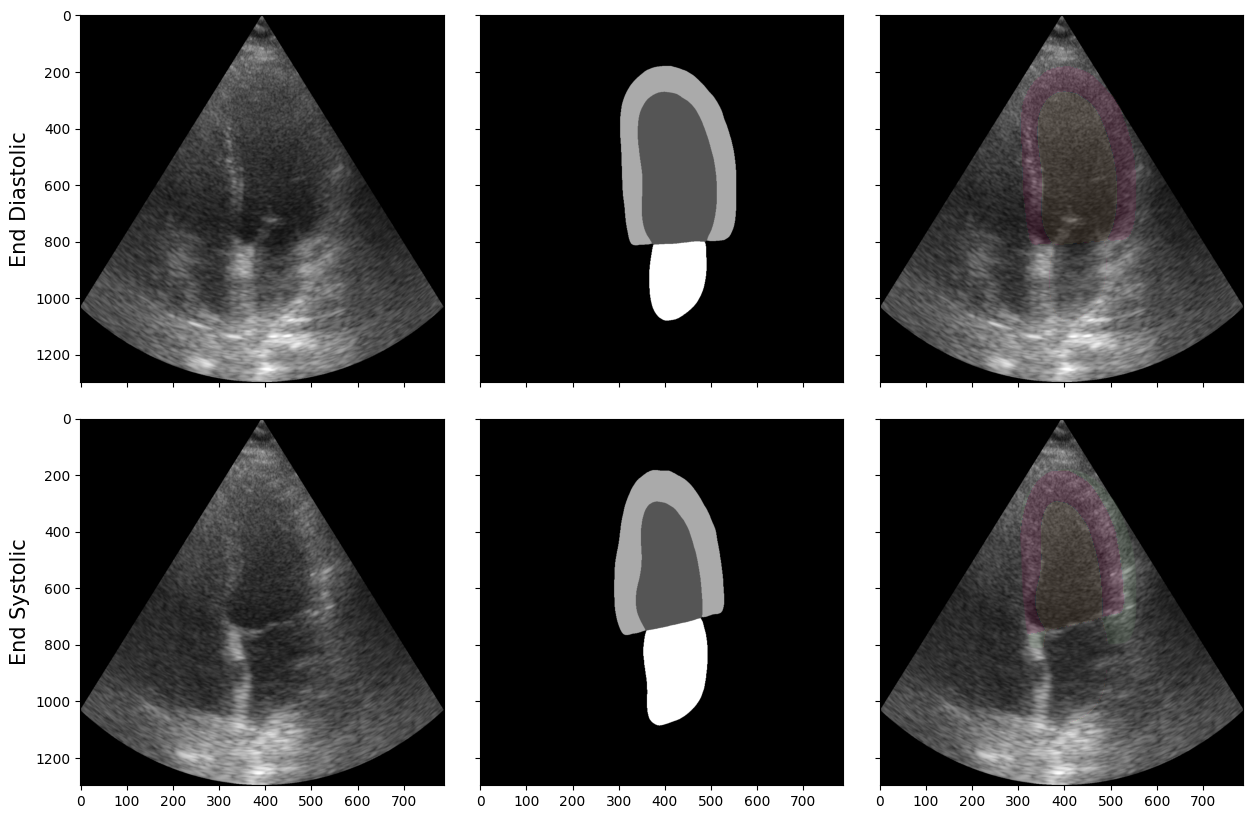

In [115]:
# Paths to testing and prediction folders
testing_folder = 'Database/testing'
prediction_folder = 'Database/Prediction/Task250_2DLeftVentricle'

patient = input('1. Enter patient number (1-50): ')

if (len(patient)) == 1:
    view = input('2. Choose view (2CH-4CH): ')
    patient_full = 'patient000'.format(patient)
    zeros = '000'
    if view == '2CH':
        print('Loading Patient000{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, patient, view, zeros)
        
    elif view == '4CH':
        print('Loading Patient000{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, patient, view, zeros)

    else:
        print('Wrong choice! Try again')

elif (len(patient)) == 2 and patient <= '50':
    view = input('2. Choose view (2CH-4CH): ')
    zeros = '00'
    if view == '2CH':
        print('Loading Patient00{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, patient, view, zeros)
    
    elif view == '4CH':
        print('Loading Patient00{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, patient, view, zeros)
        
    else:
        print('Wrong choice! Try again') 
else:
    print('Error! Insert a number between 1 and 50')

In [27]:
result = cv2.bitwise_and(patient0001_4CH_ED[0], patient0001_4CH_ED[0], mask=patient0001_4CH_ED_pred[0])
result_gt = cv2.bitwise_and(patient0001_4CH_ED[0], patient0001_4CH_ED[0], mask=patient0001_4CH_ED_pred[0])

(-0.5, 668.5, 1101.5, -0.5)

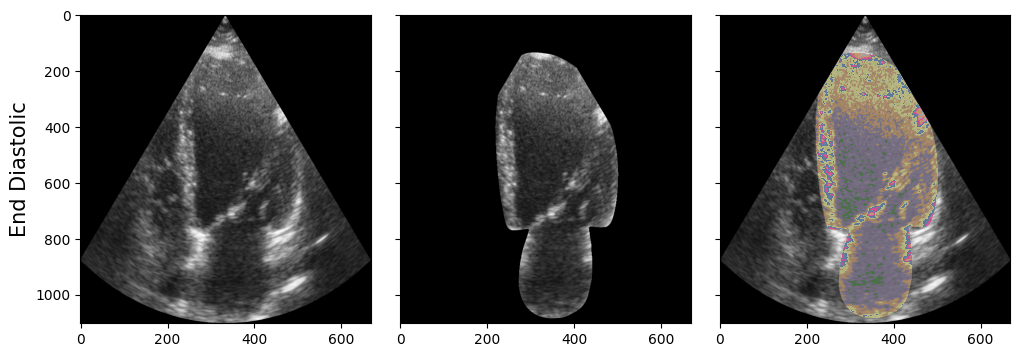

In [175]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, hspace=0.1, wspace=0.1)
(ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')

# END-DIASTOLIC
ax1.imshow(patient0001_4CH_ED[0], cmap='gray')
ax1.axis('auto')
ax1.set_ylabel("End Diastolic", fontsize=15)

ax2.imshow(result, cmap='gray')
ax2.axis('auto')

ax3.imshow(patient0001_4CH_ED[0], cmap='gray')
ax3.imshow(result, alpha=(result>0)*0.5, cmap='Accent')
ax3.axis('auto')

# Evaluation metrics

In [108]:
import json
f = open('C:/Users/oriol/OneDrive/Escritorio/TFG/Results/summary.json')
data = json.load(f)

In [154]:
Bckg_dice = []
LVEpi_dice = []
LVEndo_dice = []
LA_dice = []

for i in range(0, len(data['results']['all'])):
    # Background
    Bckg_dice.append(data['results']['all'][i]['0']['Dice'])

    #Left ventricle
    LVEpi_dice.append(data['results']['all'][i]['1']['Dice'])
    
    # Wall
    LVEndo_dice.append(data['results']['all'][i]['2']['Dice'])
    
    # Left atrium
    LA_dice.append(data['results']['all'][i]['3']['Dice'])

dice_data = [Bckg_dice, LVEpi_dice, LVEndo_dice, LA_dice]

C:\Users\oriol\AppData\Local\Temp\ipykernel_2568\630606876.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Background', 'Left ventricle epicardium','Left ventricle endocardium', 'Left atrium'])


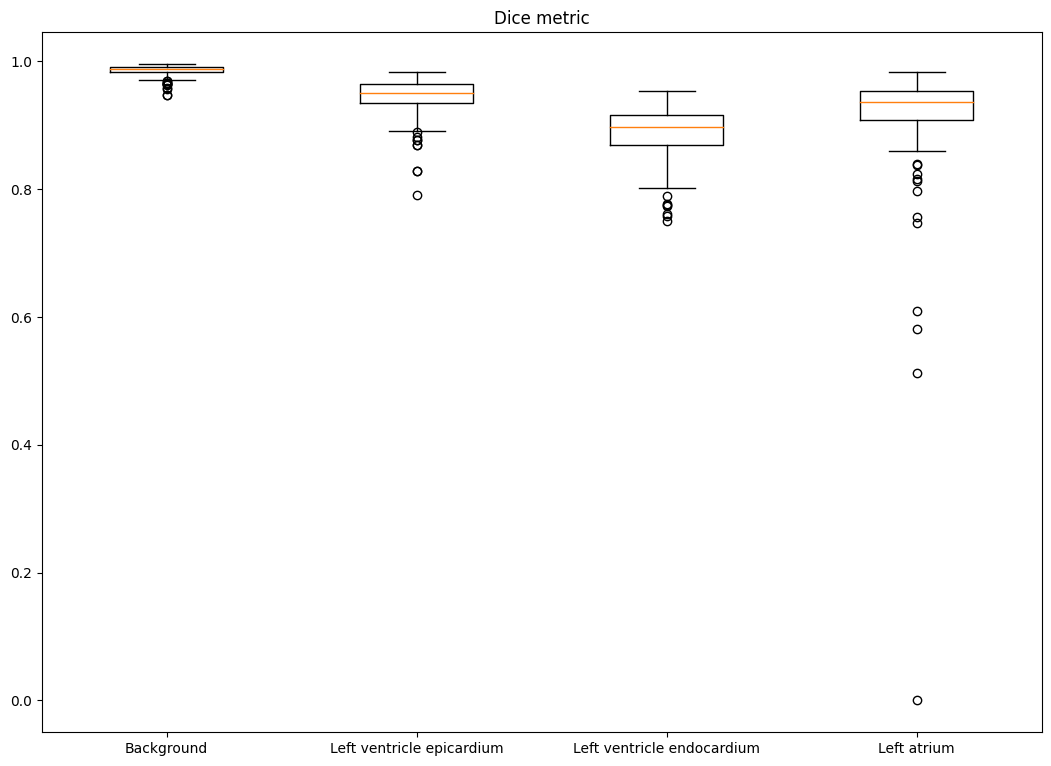

In [155]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Background', 'Left ventricle epicardium','Left ventricle endocardium', 'Left atrium'])
 
plt.title("Dice metric")
bp = ax.boxplot(dice_data)
plt.show()